<a href="https://colab.research.google.com/github/tomifarall/Orga-Datos-Tp2/blob/master/yusmachinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
#from catboost import CatBoostRegressor
#!pip install catboost

In [5]:
!pip install catboost
from catboost import CatBoostRegressor


     |████████████████████████████████| 64.8MB 60kB/s 


In [6]:
#ESTO NO LO EJECUTEN SI UTILIZAN UNA VERSION DE PC , YO LO HAGO PARA PODER USAR EL TRAIN DE MI DRIVE,Y USAR EL GITHUB ONLINE
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '17W62hzkAYKT-5tizZWF03jsC4RE0QkqQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train.csv')

In [7]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
test_id = '1uPd0roB5CyXnjXHm3R_0QqKcoaCZyrpX'
downloaded = drive.CreateFile({'id': test_id})
downloaded.GetContentFile('test.csv')

In [8]:
data = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [9]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
def agregarfeature(archivo):

  
  #agrego longitud
  archivo['length']=archivo['text'].str.len()
  #vectorizo el text
  vectorizer= CountVectorizer(max_features=40)
  features=vectorizer.fit_transform(archivo['text']).todense()
  txt_encode_frame=pd.DataFrame(features)
  archivo[txt_encode_frame.columns]=txt_encode_frame
  
  archivo.drop(['text','id'], axis=1, inplace=True)
  
  #categorizo los null de keyword y location
  archivo['keyword'].fillna('no keyword', inplace = True) 
  archivo['location'].fillna('no location', inplace = True)

  #agrego longitud keyword y elimino keyword(despues tendria que mejorar eso)
  archivo['keyword'] = archivo['keyword'].str.replace('%20', ' ')
  archivo['keyword_length'] = archivo['keyword'].str.len()
  archivo.drop(['keyword'], axis=1, inplace=True)

  #USA y United States son sinónimos, vamos a reemplazar United States por USA                   
  archivo['location']= np.where((archivo['location']=='United States'), 'USA', archivo['location'])

  

  #limito los paises , solo aptos la cantidad de tweet mayor a 20


  overtwentytweet = archivo.loc[:].groupby('location').agg({'location':'count'}).nlargest(10,'location')
  overtwentytweet.columns=['canttweet']
  dataovertwentytweet=overtwentytweet.reset_index()
  dataovertwentytweet=dataovertwentytweet[dataovertwentytweet['canttweet']>15]
  archivo=pd.merge(archivo,dataovertwentytweet,on='location',how='inner')

  #mean enconding location

  archivo=archivo.groupby('location').agg(mean_encoding_location=('target','mean')).reset_index()
  archivo.drop(['location'], axis=1, inplace=True)
  print('... sucessfull')
   
   
  

In [11]:
train=data = pd.read_csv('train.csv')



In [12]:
agregarfeature(train)


... sucessfull


In [21]:

train.drop(['location'], axis=1, inplace=True)

In [ ]:
train

,target,length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,keyword_length
0,1,69,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,10
1,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,1,133,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10
3,1,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,1,88,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,1,83,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
7609,1,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0,0,0,0,0,0,0,10
7610,1,65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
7611,1,137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10


In [ ]:
#def only_letters(tweet):
#    tweet = re.sub(r'http\S*', '', tweet)
#    tweet = re.sub(r'[^a-z\s]', '', tweet)
#    return tweet

In [ ]:
#train['location'] = train['location'].apply(only_letters)     

In [ ]:
#agregarfeature(train)

In [ ]:
#df = pd.DataFrame({'location': ['cat', 'dog', 'cat', 'dog','cat'],
#                      'target': [1, 0, 1, 0,0]
#                       })

In [ ]:
train

,target,length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1,69,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,133,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,88,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,1,83,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7609,1,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0,0,0,0,0,0,0
7610,1,65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7611,1,137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:

target=train['target']
 

In [16]:
target

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [17]:
train.drop(['target'], axis=1, inplace=True)

In [20]:
train

,location,length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,keyword_length
0,no location,69,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,10
1,no location,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,no location,133,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10
3,no location,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,no location,88,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,no location,83,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
7609,no location,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0,0,0,0,0,0,0,10
7610,no location,65,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
7611,no location,137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10


In [ ]:
#catboost

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(train, target, test_size=0.2, random_state=123)

In [23]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Learning rate set to 0.053835
0:	learn: 0.4921243	total: 49.3ms	remaining: 49.3s
1:	learn: 0.4891238	total: 52.4ms	remaining: 26.2s
2:	learn: 0.4867540	total: 55.3ms	remaining: 18.4s
3:	learn: 0.4837989	total: 58.3ms	remaining: 14.5s
4:	learn: 0.4818811	total: 61.1ms	remaining: 12.2s
5:	learn: 0.4792572	total: 64.2ms	remaining: 10.6s
6:	learn: 0.4770818	total: 67.1ms	remaining: 9.52s
7:	learn: 0.4751938	total: 70.1ms	remaining: 8.69s
8:	learn: 0.4736820	total: 72.9ms	remaining: 8.03s
9:	learn: 0.4723238	total: 75.7ms	remaining: 7.49s
10:	learn: 0.4707502	total: 78.8ms	remaining: 7.08s
11:	learn: 0.4694532	total: 81.7ms	remaining: 6.73s
12:	learn: 0.4682372	total: 84.8ms	remaining: 6.44s
13:	learn: 0.4671130	total: 87.7ms	remaining: 6.18s
14:	learn: 0.4659506	total: 90.6ms	remaining: 5.95s
15:	learn: 0.4649836	total: 93.6ms	remaining: 5.76s
16:	learn: 0.4638630	total: 96.6ms	remaining: 5.59s
17:	learn: 0.4629737	total: 99.7ms	remaining: 5.44s
18:	learn: 0.4620736	total: 103ms	remaining:

## **XGBOOST**

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.5, learning_rate = 0.05,
                max_depth = 4, alpha = 10, n_estimators = 10)

In [41]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [42]:
preds = xg_reg.predict(X_test)

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.474043


# **AHORA con Kfold**

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

ValueError: ignored

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

In [ ]:
xg_reg.fit(X_train,y_train)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
test.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [ ]:
def agregarfeature(archivo):
  #agrego longitud
  archivo['length']=archivo['text'].str.len()


In [ ]:
#agrego features nuevos


busco keyword similares para completar


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
filasconkeyword=data[data['keyword'].notna()]
tweetconkeyword=filasconkeyword['text']

In [ ]:
filassinkeyword=data[data['keyword'].isna()]
tweetsinkeyword=filassinkeyword['text']

In [ ]:
tweetconkeyword

31      @bbcmtd Wholesale Markets ablaze http://t.co/l...
32      We always try to bring the heavy. #metal #RT h...
33      #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                     Crying out for more! Set me ablaze
35      On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
                              ...                        
7578     @jt_ruff23 @cameronhacker and I wrecked you both
7579    Three days off from work and they've pretty mu...
7580    #FX #forex #trading Cramer: Iger's 3 words tha...
7581    @engineshed Great atmosphere at the British Li...
7582    Cramer: Iger's 3 words that wrecked Disney's s...
Name: text, Length: 7552, dtype: object

In [ ]:
corpus=data['text']

In [ ]:
vectorizer= CountVectorizer()
#features=vectorizer.fit_transform(corpus).todense()

In [ ]:
ttweetconkeyword=vectorizer.fit_transform(tweetconkeyword).todense()
ttweetsinkeyword=vectorizer.fit_transform(tweetsinkeyword).todense()

In [ ]:
ttweetsinkeyword

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
def tweetmassimilar(untweetsinkey,tweetsconkey):
  distanciaminima=10000
  for f in tweetsconkey:
    distancia=euclidean_distances(untweetsinkey,tweetsconkey)
  
    
    if distanciaminima > distancia :
       distanciaminima=distancia
       tweetmassimilar=tweetsconkey
                         
  
  return 0

In [ ]:
def tweetmassimilar(untweetsinkey,tweetsconkey):
  distanciaminima=10000
  for f in tweetsconkey:
    distancia=euclidean_distances(untweetsinkey,tweetsconkey)
    print(distancia)
                         
  
  return 0


In [ ]:
filassinkeyword[0]


KeyError: ignored

In [ ]:
tweetmassimilar(filassinkeyword[0],filasconkeyword)

KeyError: ignored

In [ ]:
for untweet in filassinkeyword :
  tweetmassimilar(untweet,filasconkeyword):

<function __main__.tweetmassimilar>

In [ ]:
data['keyword'].fillna


<bound method Series.fillna of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object>

In [ ]:
data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [ ]:
X=data[['id','length']]
y=data['target']

train y test sin validation

In [ ]:
x_train=data[['id','length']][:6500]

In [ ]:
y_train=data['target'][:6500]

validation train y test

In [ ]:
y_validation=data['target'][6500:]

In [ ]:
x_validation=data[['id','length']][6500:]

entrenamos con 

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(x_train, y_train)
pred=neigh.predict(x_validation)
rmse = np.sqrt(mean_squared_error(y_validation, pred))
print("RMSE: %f" % (rmse))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)

In [ ]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [ ]:
pred=neigh.predict(x_validation)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_validation, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.725607


In [ ]:
X = [[0], [1], [2], [3]]
>>> y = [0, 0, 1, 1]
>>> 
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y)
KNeighborsClassifier(...)
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))
[[0.66666667 0.33333333]]

In [ ]:
#usa y united states sinonimos entonces dejamos remplazamo united states por usa
def my_fun (var1):
    data3[var1]= np.where((data3[var1]=='United States'), 'USA', data3[var1] )
    return data3

data = my_fun('location')

In [ ]:
data['length']=data['text'].str.len()
data.head()

,id,keyword,location,text,target,length,location3
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,NaN


In [ ]:
data_grouped = data.groupby('target')
data_fake = data_grouped.get_group(0)
data_real = data_grouped.get_group(1)

In [ ]:
bins=range(0,160,10)

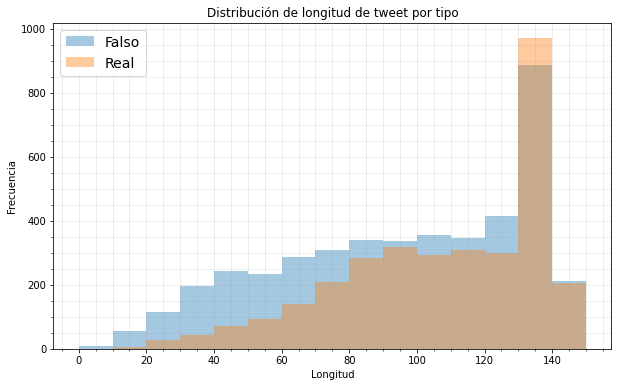

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.distplot(data_fake['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(data_real['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
#plt.show()
plt.savefig('Histogram length by type')

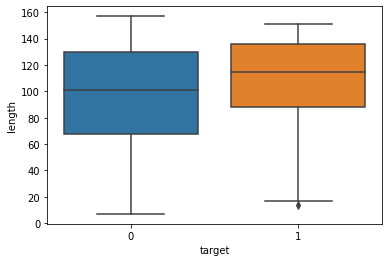

In [ ]:
ax = sns.boxplot(x="target", y="length", data=data)

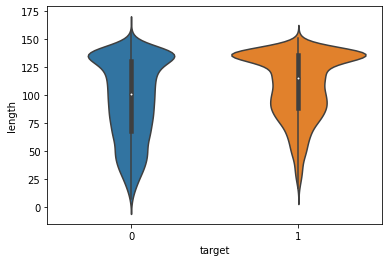

In [ ]:
ax = sns.violinplot(x="target", y="length", data=data)

**Keyword**

In [ ]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         7613 non-null   int64  
 1   keyword    7552 non-null   object 
 2   location   5080 non-null   object 
 3   text       7613 non-null   object 
 4   target     7613 non-null   int64  
 5   length     7613 non-null   int64  
 6   location3  50 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 416.5+ KB


In [ ]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean'}).reset_index()
grouped_by_keyword.columns=['keyword','target_mean','length_mean']
grouped_by_keyword

,keyword,target_mean,length_mean
0,ablaze,0.361111,94.694444
1,accident,0.685714,100.085714
2,aftershock,0.000000,101.205882
3,airplane accident,0.857143,106.400000
4,ambulance,0.526316,98.394737
...,...,...,...
216,wounded,0.702703,111.054054
217,wounds,0.303030,103.363636
218,wreck,0.189189,88.540541
219,wreckage,1.000000,122.256410


In [ ]:
grouped_by_keyword.sort_values(['target_mean'],ascending=False)

,keyword,target_mean,length_mean
62,debris,1.000000,107.594595
219,wreckage,1.000000,122.256410
70,derailment,1.000000,109.794872
153,outbreak,0.975000,128.925000
152,oil spill,0.973684,102.973684
...,...,...,...
27,body bag,0.030303,125.393939
19,blazing,0.029412,96.382353
170,ruin,0.027027,75.459459
29,body bags,0.024390,100.780488


In [ ]:
grouped_by_keyword.sort_values(['length_mean'],ascending=False)

,keyword,target_mean,length_mean
166,rescuers,0.914286,129.342857
153,outbreak,0.975000,128.925000
79,devastation,0.750000,125.722222
27,body bag,0.030303,125.393939
92,emergency services,0.333333,125.363636
...,...,...,...
23,blizzard,0.108108,71.891892
180,smoke,0.088235,70.882353
173,screaming,0.055556,70.472222
174,screams,0.142857,70.428571


In [ ]:
#Barplot?

**Wordcloud**

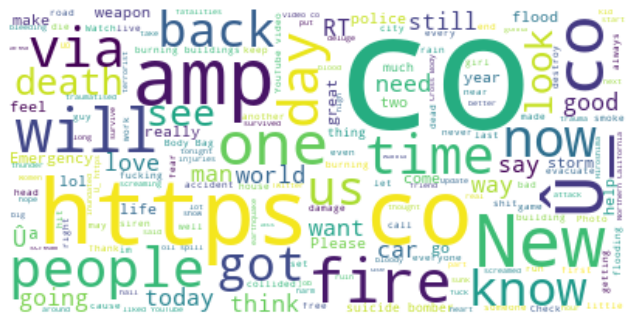

In [ ]:
wordcloud = WordCloud(background_color="white").generate(' '.join(data['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Hay muchas url

In [ ]:
data[data['text'].str.contains(pat = 'http')]

,id,keyword,location,text,target,length,location3
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,NaN
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,NaN
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,NaN
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,NaN
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55,NaN
...,...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121,NaN
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134,NaN
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,NaN
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,NaN


In [ ]:
#data['text_no_url'] = data['text'].str.replace(r'http\S+', '', regex=True)

In [ ]:
data['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

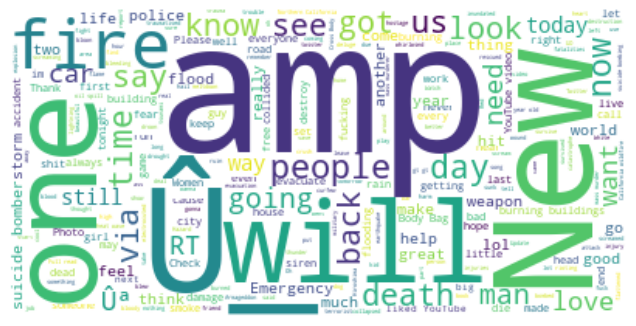

In [ ]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()                 

In [ ]:
#thi? amp? Û?

In [ ]:
#Data real

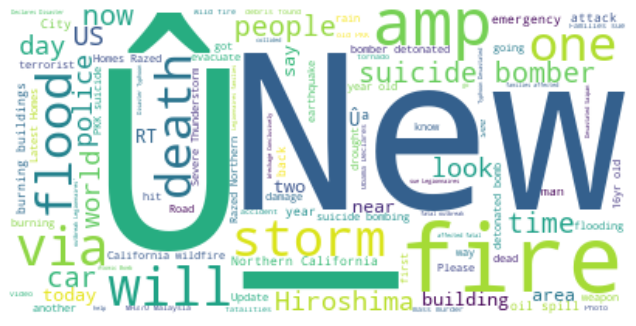

In [ ]:
#Wordcloud
wordcloud = WordCloud(background_color="white").generate(' '.join(data_real['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [ ]:
#Data falsa

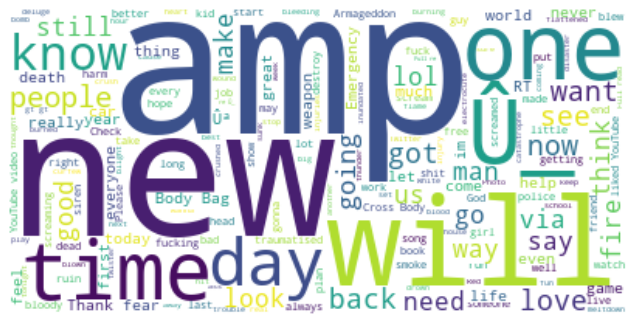

In [ ]:
#Wordcloud
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(data_fake['text'].replace(r'http\S+', ' ', regex=True)))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [ ]:
data[data['text'].str.contains('Û')]['text'].to_list()

['Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J',
 'SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r ... - http://t.co/vplR5Hka2u http://t.co/SxHW2TNNLf',
 'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @\x89Û_ https://t.co/cYoMPZ1A0Z',
 '#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident tee\x89Û_',
 'RT nAAYf: First accident in years. Turning onto Chandanee Magu from near MMA. Taxi rammed into me while I was halfway turned. Everyone conf\x89Û_',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co/weQPesENku',
 '320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co

In [ ]:
#Limpiar texto. Eliminar \x89Û

aca agrego lo que hice hasta ahora


# Cual es el porcentaje de veracidad del top 5 de localizaciones con mayor cantidad de tweet?

Text(0, 0.5, 'Porcentaje segun veracidad')

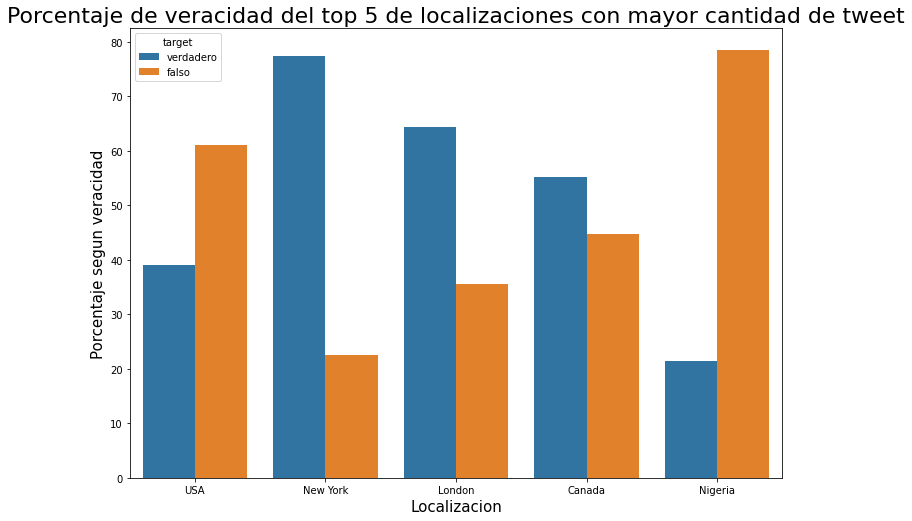

In [ ]:
cant_tweet_by_location_by_target=data.loc[ : ].fillna({'location':'nada'}).groupby(['location','target']).agg({'target':'count'})
cant_tweet_by_location_by_target.columns=['cantidad']
cant_total_tweet_by_location=cant_tweet_by_location_by_target.groupby('location').transform("sum")
porcentaje=(cant_tweet_by_location_by_target/ cant_total_tweet_by_location)*100
porcentaje=porcentaje.unstack()
porcentaje.columns=['verdadero','falso']
porcentaje=porcentaje.reset_index()
total_por_location=data.loc[:,:].groupby('location')['target'].count().nlargest(5).reset_index()
porcentaje_por_location=pd.merge(total_por_location,porcentaje,how='left',on='location')
porcentaje_por_location=porcentaje_por_location.loc[:,['location','verdadero','falso']]
plot_porcentaje=pd.melt(porcentaje_por_location, id_vars="location",var_name="target" ,value_name="survival rate")
 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='location', y='survival rate', hue='target',data=plot_porcentaje, ax=ax)

g.set_title("Porcentaje de veracidad del top 5 de localizaciones con mayor cantidad de tweet", fontsize=22)
g.set_xlabel("Localizacion",fontsize=15)
g.set_ylabel("Porcentaje segun veracidad", fontsize=15)
 

# Conlusion: vemos que en del pais africano y USA(incluyendo todos sus estados menos new york) tienen un promedio de tweet falsos respecto a sus tweet verdaderos,mientras que en new york,canada ,london hay mayor porcentaje de tweet verdaderos que probablemente se debera a esta lucha contra tweet y noticias falsas.

,relacion entre cantidad arroba,http y su veracidad

# Relacion entre cantidad # en el texto y su veracidad?

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

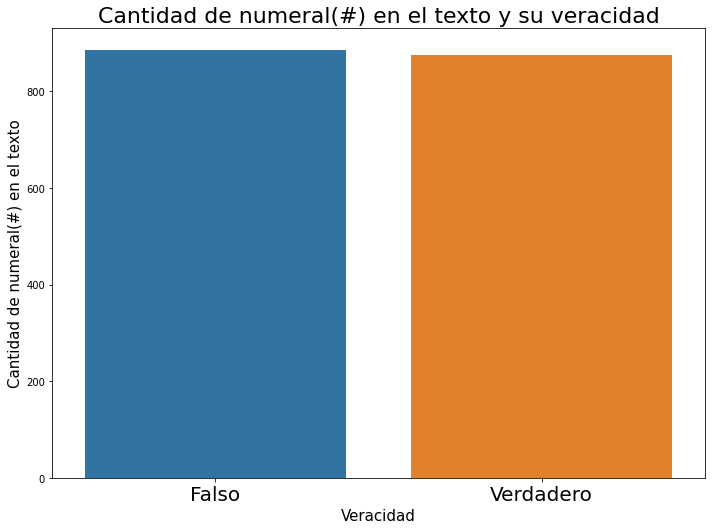

In [ ]:
cant_arroba_veracidad=data['text'].str.contains('#').groupby(data['target']).sum().reset_index()
cant_arroba_veracidad.columns=['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='veracidad', y='cantidad', data=cant_arroba_veracidad, ax=ax)
g.set_title("Cantidad de numeral(#) en el texto y su veracidad", fontsize=22)
g.set_xlabel("Veracidad",fontsize=15)
g.set_ylabel("Cantidad de numeral(#) en el texto", fontsize=15)
g.set_xticklabels(['Falso','Verdadero'], rotation='horizontal', fontsize=20)

# Conclusion:vemos que usar # en el texto no produce una diferencia en su veracidad del mismo

# Relacion entre cantidad de http en el texto y su veracidad

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

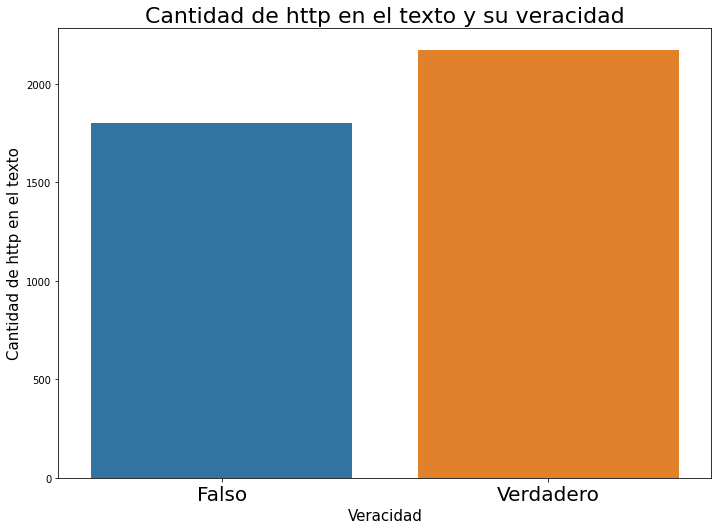

In [ ]:
cant_http_veracidad=data['text'].str.contains('http').groupby(data['target']).sum().reset_index()
cant_http_veracidad.columns=['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
 
g=sns.barplot(x='veracidad', y='cantidad', data=cant_http_veracidad, ax=ax)
g.set_title("Cantidad de http en el texto y su veracidad", fontsize=22)
g.set_xlabel("Veracidad",fontsize=15)
g.set_ylabel("Cantidad de http en el texto", fontsize=15)
g.set_xticklabels(['Falso','Verdadero'], rotation='horizontal', fontsize=20)

# Vemos que si el tweet posee http , es mas probable que sea verdadero,sera porque la gente usa tweeter para linkear noticias,imagenes,videos de otros sitios

In [ ]:
#paises con promedio de longitud de tweet verdadero   mayor al promedio mundial de tweet verdaderos

# Que localizaciones con promedio de longitud de tweet verdadero es mayor al promedio mundial de tweet verdaderos?

Text(0, 0.5, 'Promedio de longitud de tweet verdaderos')

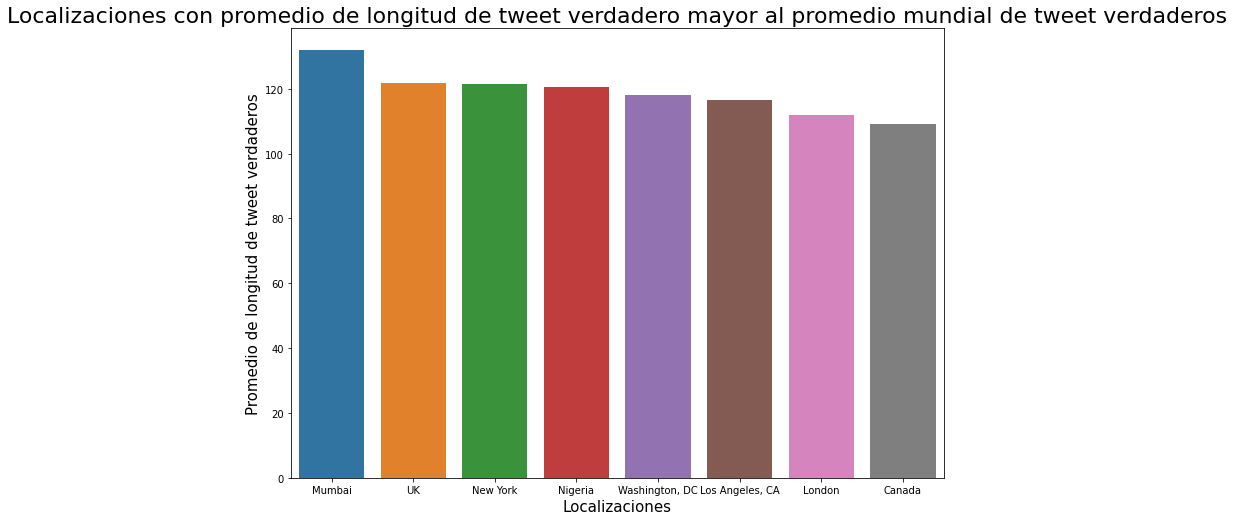

In [ ]:
datasinnullos=data.fillna({'location':'nada'})
#promedio mundial de longitud de tweet falsos y verdaderos
meanlength_mundial_false=datasinnullos.groupby('target').agg({'length':'mean'}).unstack()
meanlength_mundial_true=datasinnullos.loc[datasinnullos['target']==1,'length'].mean()
meanlength_mundial_false=datasinnullos.loc[datasinnullos['target']==0,'length'].mean()
mean_by_location_target=datasinnullos.loc[:].groupby(['location','target']).agg({'length':'mean'})
mean_by_location_target=mean_by_location_target.unstack()
mean_by_location_target.columns=['meanlenght_falsos','meanlength_verdaderos']
mean_by_location_target=mean_by_location_target.reset_index()
#aca agarro los paises con por lo menos 40 tweet hechos, sino da cualquier 
#resultado(paises con un solo tweet que gana al promedio de verdadero o falso)
boolean_paises_hightcounttweet=datasinnullos.loc[:].groupby('location')['target'].count()>20
boolean_paises_hightcounttweet=boolean_paises_hightcounttweet.to_frame().reset_index()['target']
#agrego una columna boolean que calcule antes para filtrar solo paises que sean mayor a 40 tweet
mean_by_location_target['superalos40tweet']=boolean_paises_hightcounttweet
mean_by_location_target=mean_by_location_target[mean_by_location_target['superalos40tweet']]
#meanlength_mundial_false=datasinnullos.groupby('target').agg({'length':'mean'}).unstack()
#meanlength_mundial_true=datasinnullos.loc[datasinnullos['target']==0,'length'].mean()
mean_by_location_target['meanlength_mundial_falsos']=meanlength_mundial_false
mean_by_location_target['meanlength_mundial_verdaderos']=meanlength_mundial_true
mean_by_location_target['pais_meanlength_mayor_prommundial_true']=mean_by_location_target['meanlength_verdaderos']>mean_by_location_target['meanlength_mundial_verdaderos']
paisesmenmayoralmeanmundial=mean_by_location_target[mean_by_location_target['pais_meanlength_mayor_prommundial_true']]
d=paisesmenmayoralmeanmundial[['location','meanlength_verdaderos','meanlength_mundial_verdaderos']].nlargest(9,'meanlength_verdaderos')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='location', y='meanlength_verdaderos', data=d, ax=ax)
g.set_title("Localizaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos", fontsize=22)
g.set_xlabel("Localizaciones",fontsize=15)
g.set_ylabel("Promedio de longitud de tweet verdaderos", fontsize=15)

# Conclusion:  estas son localizaciones con promedio de longitud mayor de verdaderos que son mayor a la longitud promedio mundial de verdaderos , sus tweet seran verdaderos pero ademas presentan la carateristica de ser largos.Nos da una idea de que en esas localizaciones gran cantidad de tweet largos son verdaderos


# Que localizaciones con promedio de longitud de tweet falsos  es  mayor al promedio mundial de tweet falsos?
 



Text(0, 0.5, 'Promedio de longitud de tweet falsos')

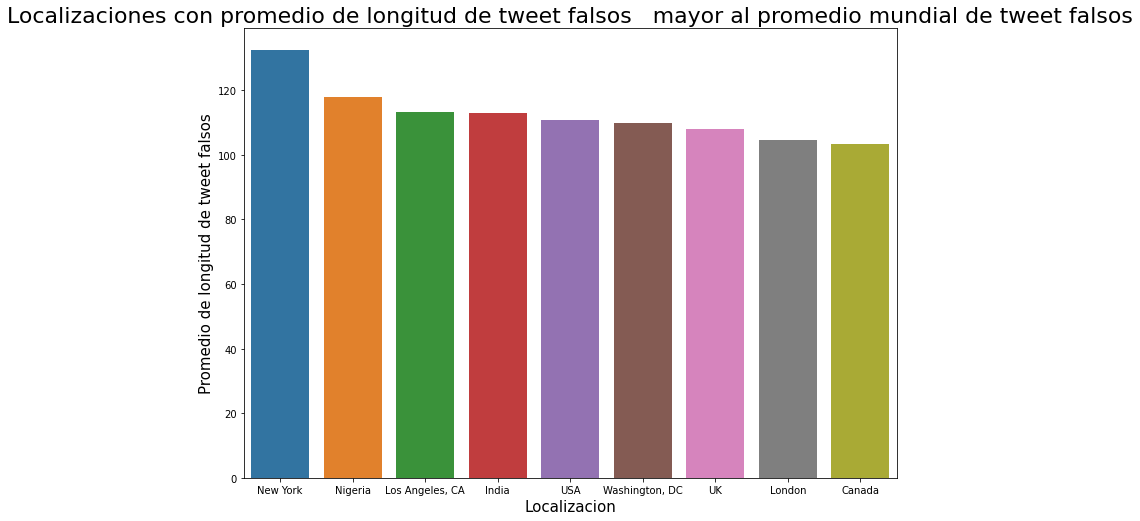

In [ ]:
mean_by_location_target['pais_meanlength_mayor_prommundial_falsos']=mean_by_location_target['meanlenght_falsos']>mean_by_location_target['meanlength_mundial_falsos']
paisesmenmayoralmeanmundial=mean_by_location_target[mean_by_location_target['pais_meanlength_mayor_prommundial_falsos']]
d=paisesmenmayoralmeanmundial[['location','meanlenght_falsos','meanlength_mundial_falsos']].nlargest(9,'meanlenght_falsos')
#################EMPIEZA###
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='location', y='meanlenght_falsos', data=d,ax=ax)
g.set_title("Localizaciones con promedio de longitud de tweet falsos   mayor al promedio mundial de tweet falsos", fontsize=22)
g.set_xlabel("Localizacion",fontsize=15)
g.set_ylabel("Promedio de longitud de tweet falsos", fontsize=15)
###########end###

# Conclusion: estas son localizaciones con promedio de longitud mayor de falsos, que son mayor a la longitud promedio mundial de falsos , sus tweet seran falsos pero ademas presentan la carateristica de ser largos.Nos da una idea de que en esas localizaciones gran cantidad de tweet largos son falsos

#  ¿Longitud de los keyword y de tweet en relacion con su veracidad?

Text(0, 0.5, 'Longitudad de tweet')

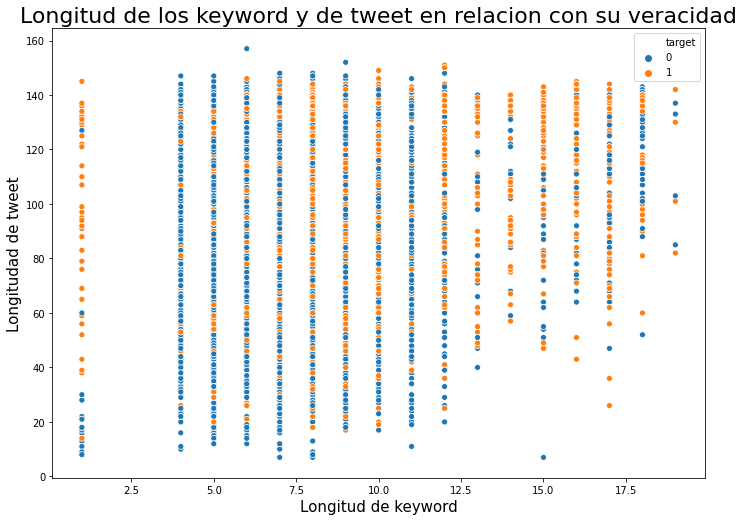

In [ ]:
data2=data
data2['keyword'].fillna('d',inplace=True)
data2['keywordlength']=data2['keyword'].str.len()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.scatterplot(x="keywordlength", y="length",hue="target", data=data2,ax=ax)
g.set_title("Longitud de los keyword y de tweet en relacion con su veracidad", fontsize=22)
g.set_xlabel("Longitud de keyword",fontsize=15)
g.set_ylabel("Longitudad de tweet", fontsize=15)

# Conclusion: vemos que si ejemplo  la longitud del keyword esta entre 10 y 12.5, su veracidad sera casi verdadera independientemente de la longitud de su tweet, hay mas rangos donde se ve ese patron,o su opuesto